# DataBriefing: Predict Sales - Part 1

This is an example notebook. You can find the accompanying article at [https://www.databriefing.com/coding/predict-sales-1/](https://www.databriefing.com/coding/predict-sales-1/)

We use data from: [https://www.kaggle.com/c/rossmann-store-sales/](https://www.kaggle.com/c/rossmann-store-sales/).

Make sure to place the data (train.csv, test.csv etc) in the folder ../../../data/rossmann/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('../../../data/rossmann/train.csv')

/usr/lib/python3/dist-packages/pandas/io/parsers.py:1150: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000
mean,558.429727,3.998341,5773.818972,633.145946,0.830107,0.381515,0.178647
std,321.908651,1.997391,3849.926175,464.411734,0.375539,0.485759,0.383056
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3727.000000,405.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5744.000000,609.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7856.000000,837.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000


In [5]:
data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [6]:
data.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [7]:
data.StateHoliday = data.StateHoliday.astype(str)

In [8]:
data.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [9]:
# List the number of unique values for each colum
# Apply the function to each column (axis=0)

def count_unique(column):
    return len(column.unique())

data.apply(count_unique, axis=0).astype(np.int32)

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         4
SchoolHoliday        2
dtype: int32

In [10]:
data.isnull().any()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

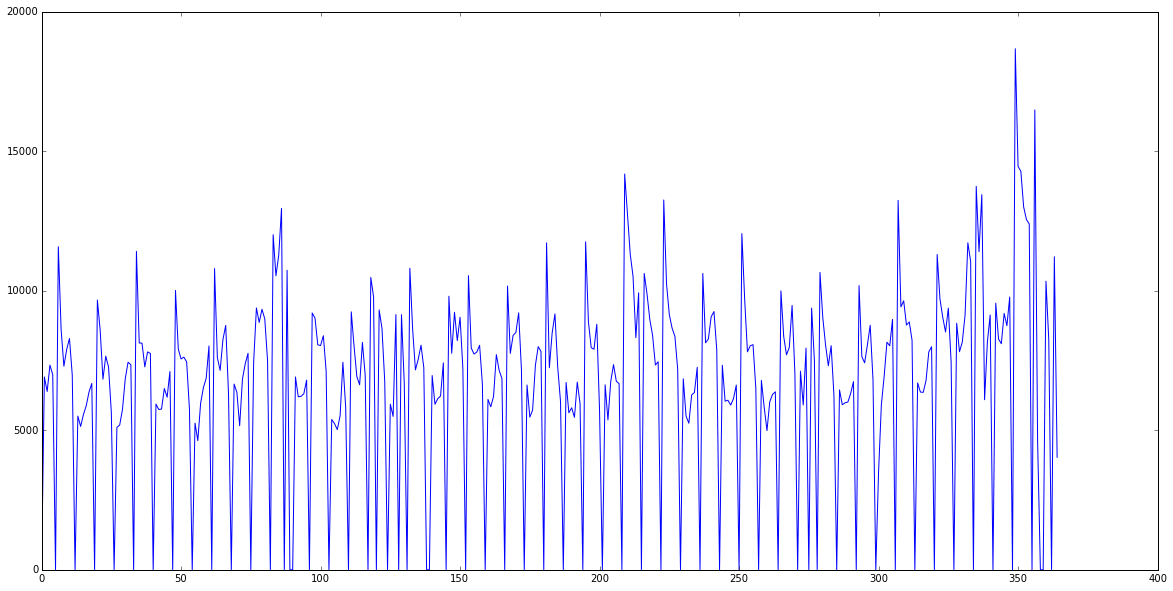

In [11]:
# Filter data for store 150 and plot sales data for first 365 days
store_data = data[data.Store==150].sort_values('Date')
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(store_data.Sales[:365])

/usr/lib/python3/dist-packages/pandas/core/frame.py:1771: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


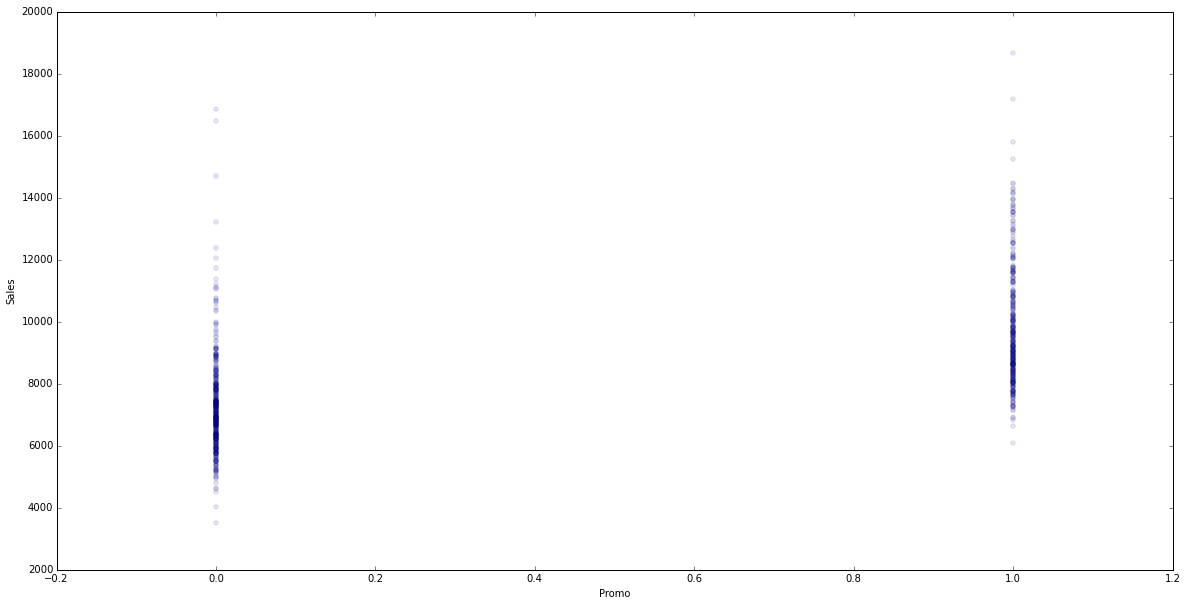

In [12]:
plt.figure(figsize=(20, 10))
plt.scatter(x=store_data[data.Open==1].Promo, y=store_data[data.Open==1].Sales, alpha=0.1)
plt.xlabel('Promo')
plt.ylabel('Sales')

## Transformations

In [13]:
transformed_data = data.drop(['Store', 'Date', 'Customers'], axis=1)

In [14]:
transformed_data.head()

,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday
0,5,5263,1,1,0,1
1,5,6064,1,1,0,1
2,5,8314,1,1,0,1
3,5,13995,1,1,0,1
4,5,4822,1,1,0,1


In [15]:
transformed_data = pd.get_dummies(transformed_data, columns=['DayOfWeek', 'StateHoliday'])

In [16]:
X = transformed_data.drop(['Sales'], axis=1).values
y = transformed_data.Sales.values
print("The training dataset has {} examples and {} features.".format(X.shape[0], X.shape[1]))

The training dataset has 1017209 examples and 14 features.


## Building and cross-validating a model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation as cv

lr = LinearRegression()
kfolds = cv.KFold(X.shape[0], n_folds=4, shuffle=True, random_state=42)
scores = cv.cross_val_score(lr, X, y, cv=kfolds)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.55 (+/- 0.00)


## Visualizing predictions

We'll single out store 150 again and train our model on every store __except__ store 150 and then predict sales for store 150.

Remember: __Always__ use different data for training and predicting.

In [18]:
lr = LinearRegression()
X_store = pd.get_dummies(data[data.Store!=150], columns=['DayOfWeek', 'StateHoliday']).drop(['Sales', 'Store', 'Date', 'Customers'], axis=1).values
y_store = pd.get_dummies(data[data.Store!=150], columns=['DayOfWeek', 'StateHoliday']).Sales.values
lr.fit(X_store, y_store)
y_store_predict = lr.predict(pd.get_dummies(store_data, columns=['DayOfWeek', 'StateHoliday']).drop(['Sales', 'Store', 'Date', 'Customers'], axis=1).values)

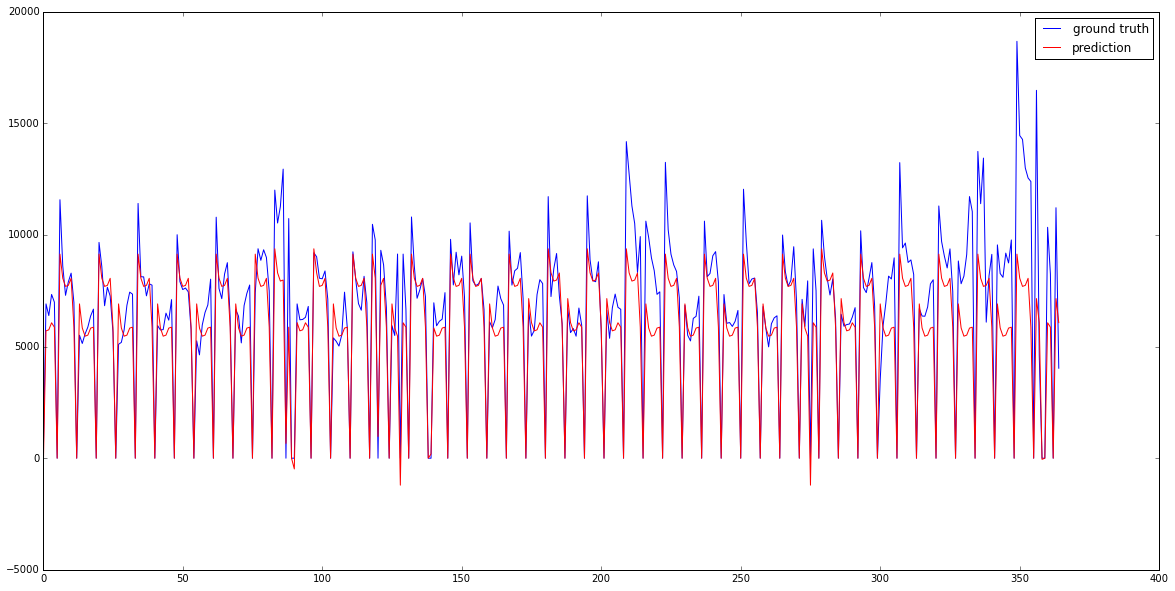

In [19]:
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(store_data.Sales[:365], label="ground truth")
plt.plot(y_store_predict[:365], c='r', label="prediction")
plt.legend()